<img src="../../notebook_banner.png" width="1024" style="float:center">
<div style="margin-top:10px; display:flex; align-items:center;">
    <div style="float:left; margin-right:10px;vertical-align:middle">
        <a href="https://www.linkedin.com/in/bruno-angles/" targer="_blank">
            <img src="../../lkin-logo.png"/>
        </a>
    </div>
    <div> 
        Bruno Anglés (21/12/2022)
    </div>
 </div>

# Análisis predictivo del precio de la vivienda

El objetivo de este proyecto es el de crear un **Modelo de Regresión Múltiple** para predecir el precio de una vivienda usando el siguiente [dataset de Kaggle](https://www.kaggle.com/shree1992/housedata)

**Metodología**

Para abordar esta tarea se han seguido los siguientes pasos

1. Importación de las librerías de trabajo comunes para la carga, exploración y visualización de los datos. También se configuran algunos parámetros como el aspecto visual de gráficos que vamos a ir generando.
1. Importación de datos, partimos de un fichero CSV y lo cargaremos un un dataset de Pandas.
1. Limpieza inicial de datos, en la que buscaremos problemas típicos como la presencia de nulos y registros duplicados.
1. Análisis exploratorio (también conocido como EDA por sus siglas en inglés). El objetivo es comprender cada una de las columnas del dataset, determinar si nos son o no útiles para nuestro modelo de regresión y si tenemos que aplicarles algún tratamiento. Durante esta fase corregiremos las anomalías que nos encontremos

1. Análisis de correlaciones, con un dataset ya procesado buscamos algunas variables que puedan ser redundantes, ya que estas deberían eliminarse antes de entrenar el modelo de regresión
1. Formulación de hipótesis de entrenamiento. En esta fase usamos los hallazgos encontrados en las fases de análisis y correlaciones para formular distintas hipótesis de entrenamiento de los modelos.
1. Entrenamiento, fase en la cuál entrenamos distintos modelos según las hipótesis formuladas en el apartado anterior.
1. Evaluación, comparamos los distintos modelos empleando la métrica **MSE** (Error Cuadrático Medio) y determinamos cuál es más preciso.
1. Conclusiones, dónde resumimos el trabajo realizado.

En esta libreta resaltaremos los distintos allazgos encontrados usando celdas de colores, del siguiente modo

<div class="alert alert-block alert-info"> 
    Cuando el hallazgo nos lleve a formular una hipótesis
</div>

<div class="alert alert-block alert-warning"> 
    Cuando el hallazgo nos indique que debemos corregir algo en los datos
</div>

<div class="alert alert-block alert-success"> 
    Para mostrar un resultado o conclusión
</div>

## Importación del librerías

In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

params = {'axes.titlesize':'10'}
plt.rcParams.update(params)

import seaborn as sns
plt_colors = list(sns.color_palette().as_hex())

def plt_color(i):
    return plt_colors[i % len(plt_colors)]


## Importación de datos

In [2]:
# Importamos el CSV en un DataFrame de Pandas
housedata = pd.read_csv("data.csv", parse_dates=["date"])

In [3]:
# Tamaño del DataFrame (filas y columnas)
housedata.shape

(4600, 18)

In [4]:
# Visualizamos las primeras filas del DataFrame
housedata.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Limpieza de datos

En esta fase vamos a buscar dos de los problemas más comunes.

- presencia de valores nulos
- registros duplicados

In [5]:
# Buscamos valores nulos en el DataFrame
housedata.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Aparentemente el DataFrame no tiene valores nulos. Tenemos que esperar a un análisis en profundidad de las distintas columnas para detectar valores incorrectos

In [6]:
# Detección de valores duplicados

dup = len(housedata) - len(housedata.drop_duplicates())
print("Duplicados encontrados:", dup)

Duplicados encontrados: 0


## EDA - Análisis exploratorio del dataset

In [7]:
# Visualizamos las columnas del DataFrame
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [8]:
## Clasificamos las columnas en varios grupos

# Variable objetivo, lo que queremos predecir
TARGET = ["price"]

# Datos numéricos
NUMERIC_COLUMNS = [
    col 
    for col in housedata.columns 
    if housedata[col].dtype in ("float64", "int64") 
    and col not in TARGET
]
print("Variables numéricas:\n", NUMERIC_COLUMNS)
print()

# De entre las numéricas las variables binarias
BINARY_COLUMNS = ["waterfront"]

# De entre las numéricas, aquellas variables con valores discretos
DISCRETE_COLUMNS = ["bedrooms", "bathrooms", "floors", "view", "condition", "yr_built", "yr_renovated"]

# Identificadores, estas variables son únicas y no nos van a servir para entenar
IDENTIFIERS = (
    # Contienen una cantidad de valores únicos superior al 95% del total de filas
    [col for col in housedata.columns if len(set(housedata[col])) > housedata.shape[0]*0.95]
)
print("Identificadores:\n", IDENTIFIERS)
print()

# Valores únicos
UNIQUE = (
    [col for col in housedata.columns if len(set(housedata[col])) == 1]
)
print("Valores únicos:\n", UNIQUE)
print()

# Variables categóricas
CATEGORICAL_COLUMNS = [col for col in housedata.columns if col not in TARGET + NUMERIC_COLUMNS + IDENTIFIERS + UNIQUE]
print("Categóricas:\n", CATEGORICAL_COLUMNS)

Variables numéricas:
 ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

Identificadores:
 ['street']

Valores únicos:
 ['country']

Categóricas:
 ['date', 'city', 'statezip']


- `street`: nombre de la calle, esta columna parece poco útil, ya que el modelo sólo nos sería de utilidad para predecir el precio de venta de una vivienda en una de esas calles
- `country`: país, esa es poco relevante ya que en todos los registros es igual

<div class="alert alert-block alert-warning"> 
    Eliminamos los identificadores y las variables únicas
</div>

In [9]:
housedata.drop(IDENTIFIERS + UNIQUE, axis=1, inplace=True)
print(housedata.shape)

(4600, 16)


In [10]:
# Visualizamos los datos numéricos
housedata[NUMERIC_COLUMNS].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00,2300.00,9410.0
sqft_basement,4600.0,312.081522,464.137228,0.0,0.00,0.00,610.00,4820.0


Esta información se ha obtenido del [siguiente notebook](https://www.kaggle.com/code/hnnhytc/data-analysis-with-python)

- `bedrooms`: número de habitaciones
- `bathrooms`: número de baños
- `sqft_living`: superficie habitable
- `sqft_lot`: superficie de la parcela
- `floors`: número de plantas de la vivienda
- `sqft_above`: superficie de la vivienda sin tener en cuenta el sótano
- `sqft_basement`: superficie del sótano
- `yr_built`: Año de construcción
- `yr_renovated`: Año en el que la casa fué renovada
- `view`: cantidad de veces que ha sido vista la vivienda
- `condition`: condición general de la vivienda
- `waterfront`: si tiene vistas al agua

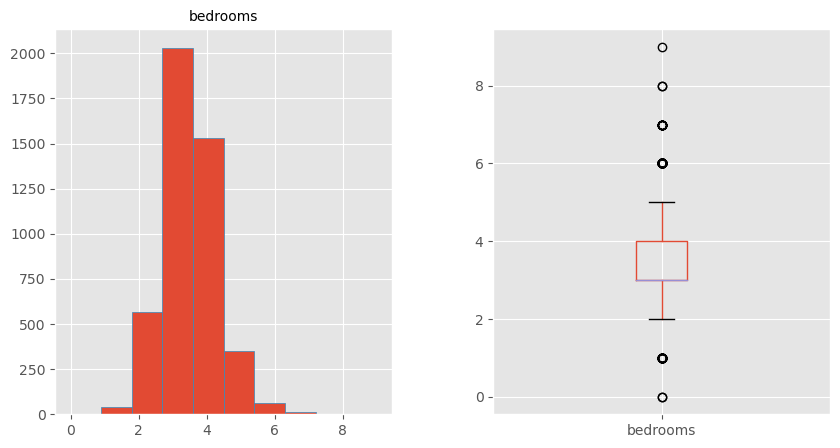

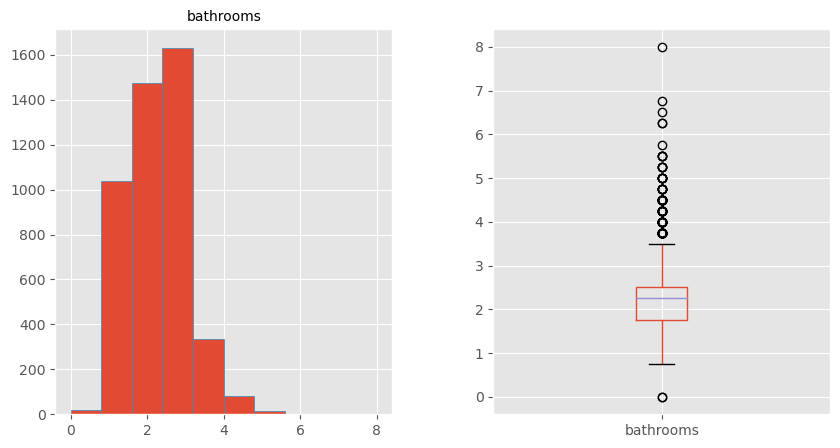

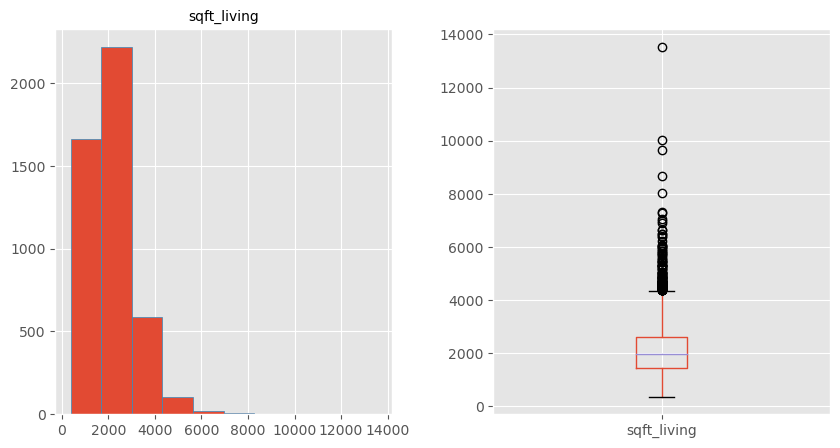

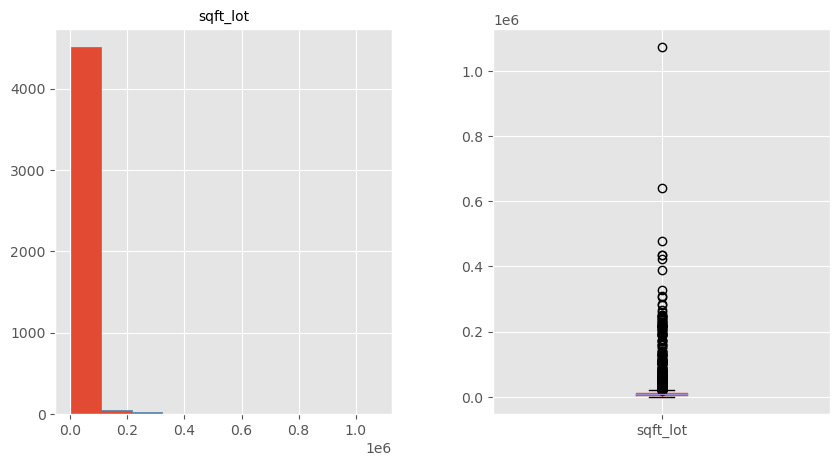

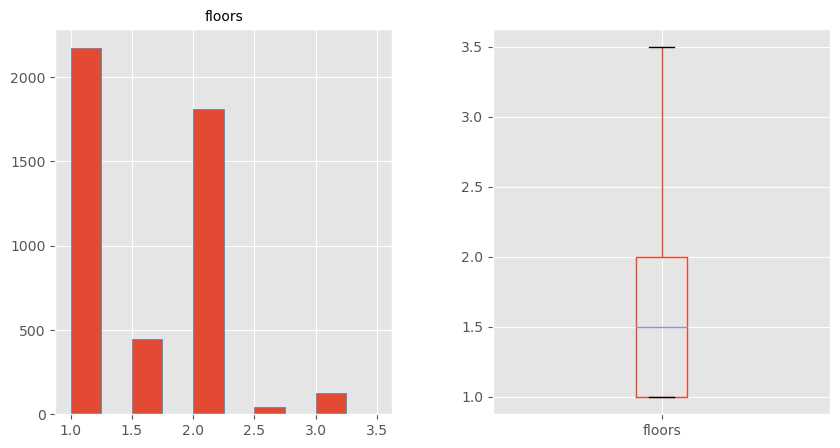

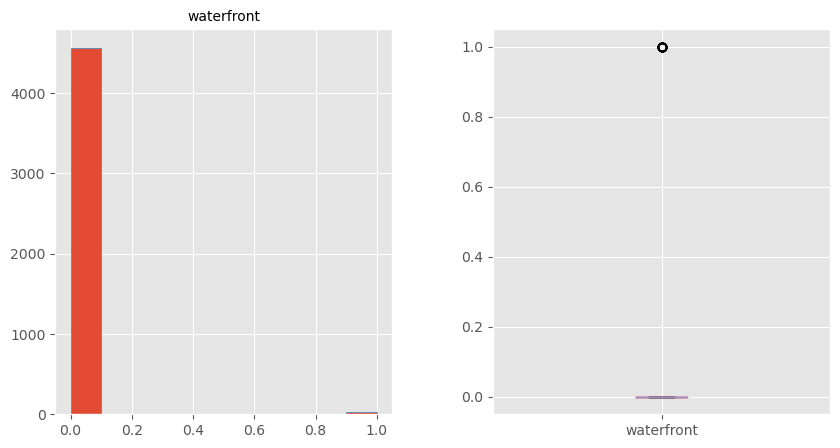

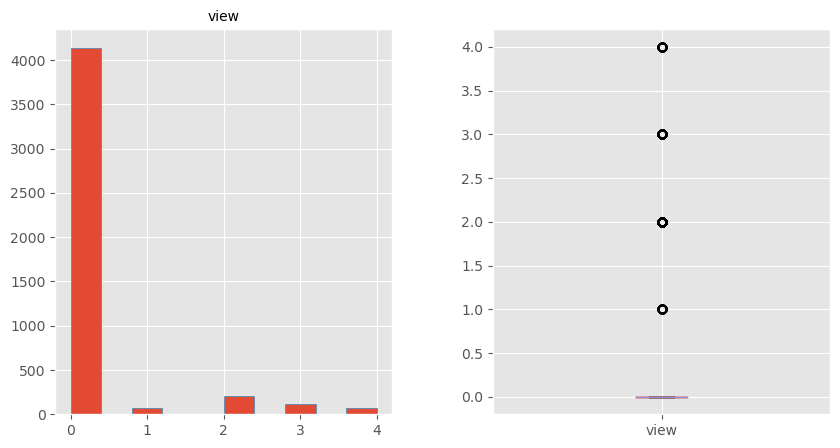

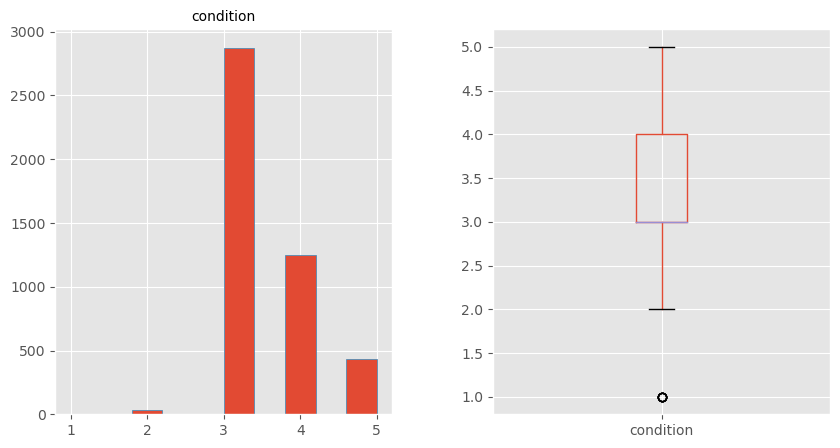

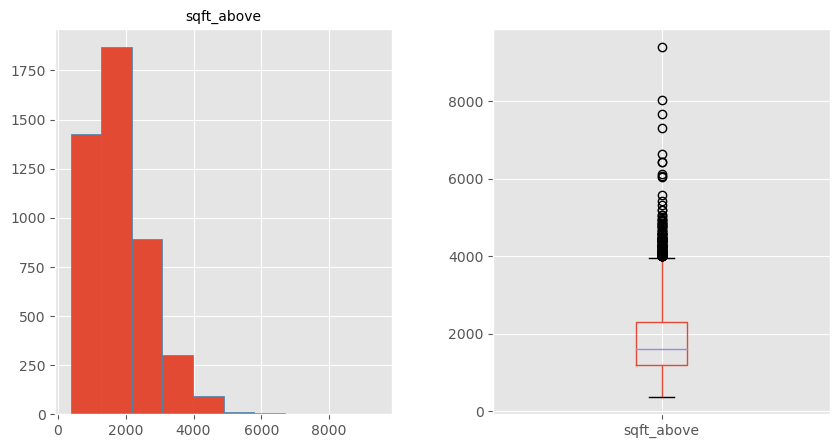

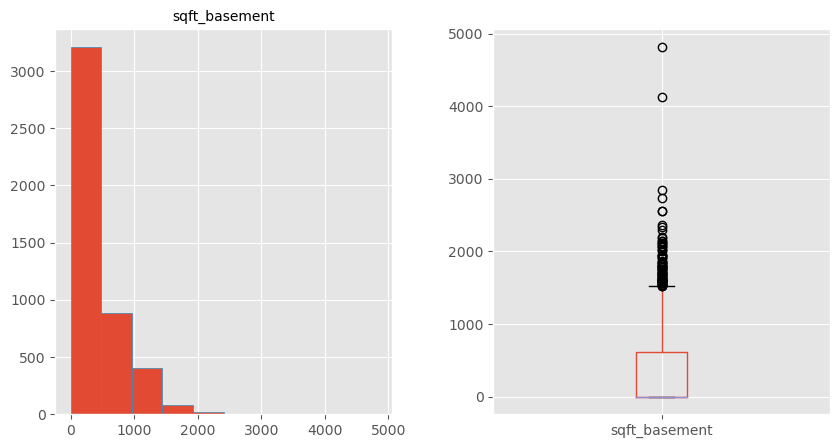

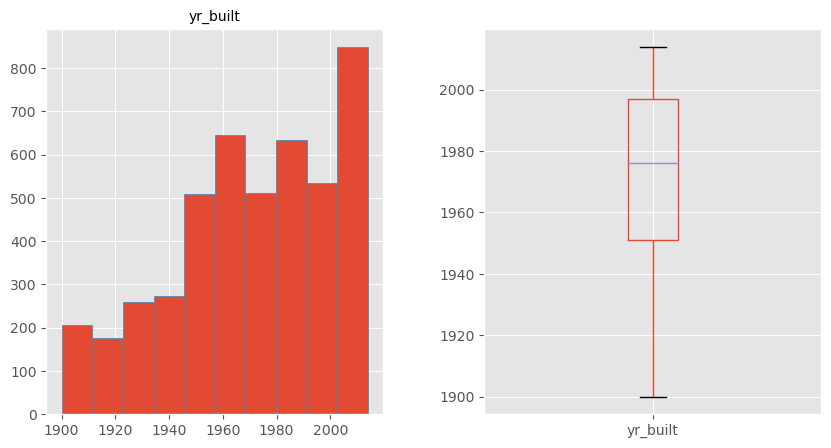

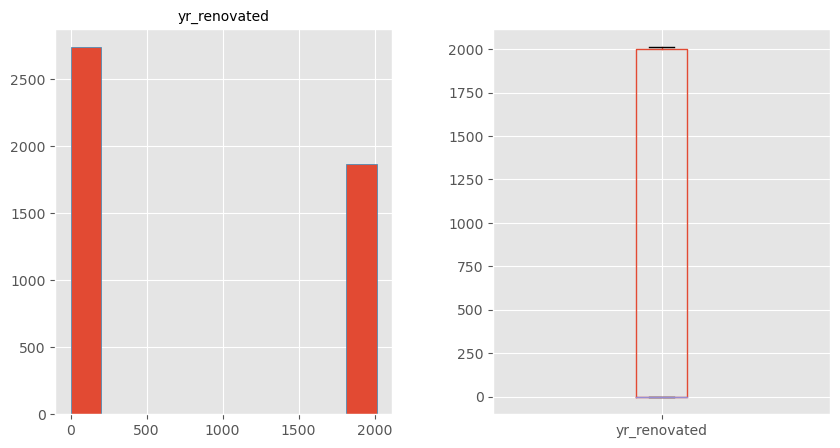

In [11]:

for i,col in enumerate(NUMERIC_COLUMNS):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    housedata.hist(ax=axes[0], column=col, ec=plt_colors[1])
    housedata.boxplot(ax=axes[1], column=col)
    plt.show()

<div class="alert alert-block alert-info">
    <p><strong><a id="outliers">[1]</a> Valores anómalos</strong></p>
    <p>
        Vemos que tenemos valores anómalos lo que nos lleva a formular una posible hipótesis de entrenamiento: <em>Eliminar dichos valores anómalos del DataFrame</em>
    </p>
</div>


In [12]:
# Comprobación de los valores discretos
for col in DISCRETE_COLUMNS + BINARY_COLUMNS:
    print(f"{col}:\n", list(set(housedata[col])))

bedrooms:
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
bathrooms:
 [0.75, 1.5, 2.25, 2.5, 2.0, 1.0, 1.75, 2.75, 3.0, 3.25, 3.5, 8.0, 4.25, 4.0, 5.0, 1.25, 3.75, 4.5, 4.75, 5.75, 5.25, 5.5, 6.5, 6.25, 0.0, 6.75]
floors:
 [1.5, 2.0, 3.0, 2.5, 1.0, 3.5]
view:
 [0, 1, 2, 3, 4]
condition:
 [1, 2, 3, 4, 5]
yr_built:
 [1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2

<div class="alert alert-block alert-warning"> 
    <p><strong>Redondeo de valores</strong></p>
    <p>Va a ser necesario aplicar un redondeo a las siguientes variables
        <ul>
            <li><code>bathrooms</code></li>
            <li><code>floors</code></li>
        </ul>
    </p>
</div>

In [13]:
# Redondeamos 
housedata.bathrooms = round(housedata.bathrooms)
print(set(housedata.bathrooms))

housedata.floors = round(housedata.floors)
print(set(housedata.floors))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}
{1.0, 2.0, 3.0, 4.0}


In [14]:
# Casos en los que el año de renovación es cero
housedata[housedata.yr_renovated == 0].shape

(2735, 16)

In [15]:
housedata[(housedata.yr_renovated > 0) & (housedata.yr_renovated < housedata.yr_built)].shape

(195, 16)



<div class="alert alert-block alert-warning">
    <p>
        Considero que el modelo de regresión generalizaría mejor si <code>yr_old</code> y <code>yr_renovated</code>, fueran la diferencia de años desde la construcción o la renovación en vez de los años concretos
    </p>
    <p>
        Además hay casos en los que el año de renovación es cero o menor al año de construcción. Como esto no puede ser igualaremos en esos casos <code>yr_renovated = yr_buit</code>
    </p>
</div>

In [16]:
# Tratamos los casos en los que yr_renovated sea cero o menor a yr_built
mask = housedata.yr_renovated < housedata.yr_built
housedata.loc[mask, "yr_renovated"] = housedata.loc[mask, "yr_built"]

print(housedata[housedata.yr_renovated < housedata.yr_built].shape)

(0, 16)


In [17]:
# Cambiamos yr_renovated y yr_built por la diferencia en años
housedata.yr_built = housedata.apply(
    lambda x: x.date.year - x.yr_built,
    axis=1
)

housedata.yr_renovated = housedata.apply(
    lambda x: x.date.year - x.yr_renovated,
    axis=1
)

housedata[["yr_built", "yr_renovated"]].head()

,yr_built,yr_renovated
0,59,9
1,93,93
2,48,48
3,51,51
4,38,22


In [18]:
# Rango de la variable 'date'
print("Date min:", housedata.date.min())
print("Date max:", housedata.date.max())

Date min: 2014-05-02 00:00:00
Date max: 2014-07-10 00:00:00


¿Es relevante esta variable para nuestro modelo de regresión?

<div class="alert alert-block alert-warning">
Según vemos, los datos fueron obtenidos durante los meses de mayo, juno y julio de 2014. Consideramos que son datos insuficientes para observar una estacionalidad que podamos generalizar, por lo que decidimos eliminar esta columna del dataframe.
</div>

In [19]:
# Quiamos "date" del listado de columnas categóricas
CATEGORICAL_COLUMNS = [col for col in CATEGORICAL_COLUMNS if col != "date"]
print("Categóricas:\n", CATEGORICAL_COLUMNS)

# Elimiinamos la columna del dataframe
housedata.drop("date", axis=1, inplace=True)

housedata.shape

Categóricas:
 ['city', 'statezip']


(4600, 15)

**Dependencia lineal entre `sqft_living`, `sqft_above`  y `sqft_basement`**

Parece que entre estas variables hay la siguiente dependencia lineal

$$
sqft\_living = sqft\_above + sqft\_basement
$$

Vamos a confirmar si es así en todos los casos

In [20]:
print("Dependencia lineal entre sqft_living, sqft_above y sqft_basement")
(
    pd.DataFrame(
        housedata.sqft_living == (housedata.sqft_above + housedata.sqft_basement)
        , columns=["ldep"])
    .reset_index()
    .groupby("ldep")
    .count()
)

Dependencia lineal entre sqft_living, sqft_above y sqft_basement


,index
ldep,
True,4600


<div class="alert alert-block alert-warning"> 
    Elimino la variable <code>sqft_living</code>  por ser una combinación de las otras dos
</div>

In [21]:
# Eliminamos sqft_living de las variables numéricas
NUMERIC_COLUMNS = [c for c in NUMERIC_COLUMNS if c != "sqft_living"]
print(NUMERIC_COLUMNS)

# Eliminamos sqft_living del DataFrame
housedata.drop("sqft_living", axis=1, inplace=True)
print(housedata.shape)

['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
(4600, 14)


**¿Són útiles el resto de variables categóricas?**

In [22]:
CATEGORICAL_COLUMNS

['city', 'statezip']

In [23]:
total_us_cities = 331
dataset_cities = len(housedata.city.unique())
print("El procentaje de ciudades representado en el dataset es de:"
      f" {dataset_cities / total_us_cities * 100:.2f}%")

total_us_zipcodes = 41683
dataset_zipcodes = len(housedata.statezip.unique())
print("El procentaje de códigos postales representados en el dataset es de:"
      f" {dataset_zipcodes / total_us_zipcodes * 100:.2f}%")

El procentaje de ciudades representado en el dataset es de: 13.29%
El procentaje de códigos postales representados en el dataset es de: 0.18%


Usar las variables `statezip` y `city` limita el uso del modelo a las ciudades y códigos postales incluídos en el entrenamiento. Además estas variables son redundantes ya que un código postal sólo puede pertenecer a una única ciudad

<div class="alert alert-block alert-info"> 
    <p>
    <b><a id="city_and_statezip">[2]</a></b> Plantearemos varias hipótesis de entrenamisnto
    <ul>
        <li>Una en la que excluyamos estas dos variables</li>
        <li>Otra en el que incluyamos <code>statezip</code> o <code>city</code>, entrenando dos modelos diferentes</li>
    </ul>
    </p>
    <p>
        La estrategia será ver si conseguimos más precisión usando la información sobre el código postal o la ciudad. Si conseguimos más precisión con estos modelos, los consideraremos como válidos pero no descartaremos el modelo que contiene sólo las variables numéricas.
    </p>
    <p>
    En el caso de tener que predecir el valor de una vivienda, comprobaremos si esta pertenece una de las ciudades o códigos postales para los que se han entrenado estos modelos. De ser así los emplearemos. En caso contrario usaremos el modelo principal.
    <p>
</div>

Referencias:
- [List of United States cities by population](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population)
-[41,683 ZIP Codes](https://facts.usps.com/42000-zip-codes/)

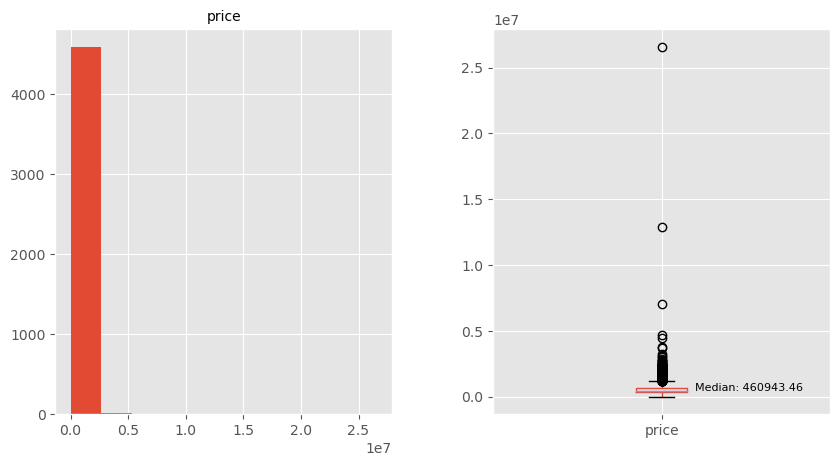

Price (min): price    0.0
dtype: float64
Price (max): price    26590000.0
dtype: float64


In [24]:
# Análisis de la variable objetivo

plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

housedata.hist(ax=ax1, column=TARGET)
housedata.boxplot(ax=ax2, column=TARGET)
med = housedata.price.median()
ax2.text(x=1.1, y=med, s=f"Median: {med:.2f}", fontsize=8)
plt.show()

print("Price (min):", housedata[TARGET].min())
print("Price (max):", housedata[TARGET].max())

Vemos que tenemos valores anómalos y estos nos hacen difícl ver cómo se distribuyen.

- Por una parte hay viviendas con precio cero, lo cuál es un error
- Por otra parte hay algunas viviendas con un valor muy por encima del resto

Los valores grandes los eliminaremos en una de las hipótesis [[1](#outliers)]

In [25]:
# ¿Qué ocurre con las viviendas con precio == 0

pzero = len(housedata[housedata.price == 0])
total = len(housedata)

print("Los registros con price == 0 representan un"
      f" {pzero / total * 100:.2f}% del total"
      f"({pzero} de {total})")

Los registros con price == 0 representan un 1.07% del total(49 de 4600)


<div class="alert alert-block alert-warning"> 
    Debido al pequeño porcentaje de dasos decidimos eliminar los registros donde <code>price == 0</code> del DataFrame. 
</div>

In [26]:
# Eliminar los casos en los que price == 0
housedata = housedata[housedata.price > 0]
print(housedata.price.min())

7800.0


## Análisis de correlaciones

Vamos a realizar un análisis de correlaciones de todas las variables. Para ello vamos a usar un `LabelEncoder` para codificar todas las variables categóricas y así inlcuilas en el análisis.

In [27]:
# Codificar las variables categóricas
from sklearn.preprocessing import LabelEncoder

housedata_cat_enc = housedata.copy()

for col in CATEGORICAL_COLUMNS:
    print("Codificando variable:", col)
    le = LabelEncoder()
    housedata_cat_enc[col] = le.fit_transform(list(housedata_cat_enc[col].astype(str).values))
    
housedata_cat_enc.info()

Codificando variable: city
Codificando variable: statezip
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4551 non-null   float64
 1   bedrooms       4551 non-null   float64
 2   bathrooms      4551 non-null   float64
 3   sqft_lot       4551 non-null   int64  
 4   floors         4551 non-null   float64
 5   waterfront     4551 non-null   int64  
 6   view           4551 non-null   int64  
 7   condition      4551 non-null   int64  
 8   sqft_above     4551 non-null   int64  
 9   sqft_basement  4551 non-null   int64  
 10  yr_built       4551 non-null   int64  
 11  yr_renovated   4551 non-null   int64  
 12  city           4551 non-null   int64  
 13  statezip       4551 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 533.3 KB


In [28]:
# Calcular correlaciones
housedata_corr = housedata_cat_enc[NUMERIC_COLUMNS + CATEGORICAL_COLUMNS].corr()

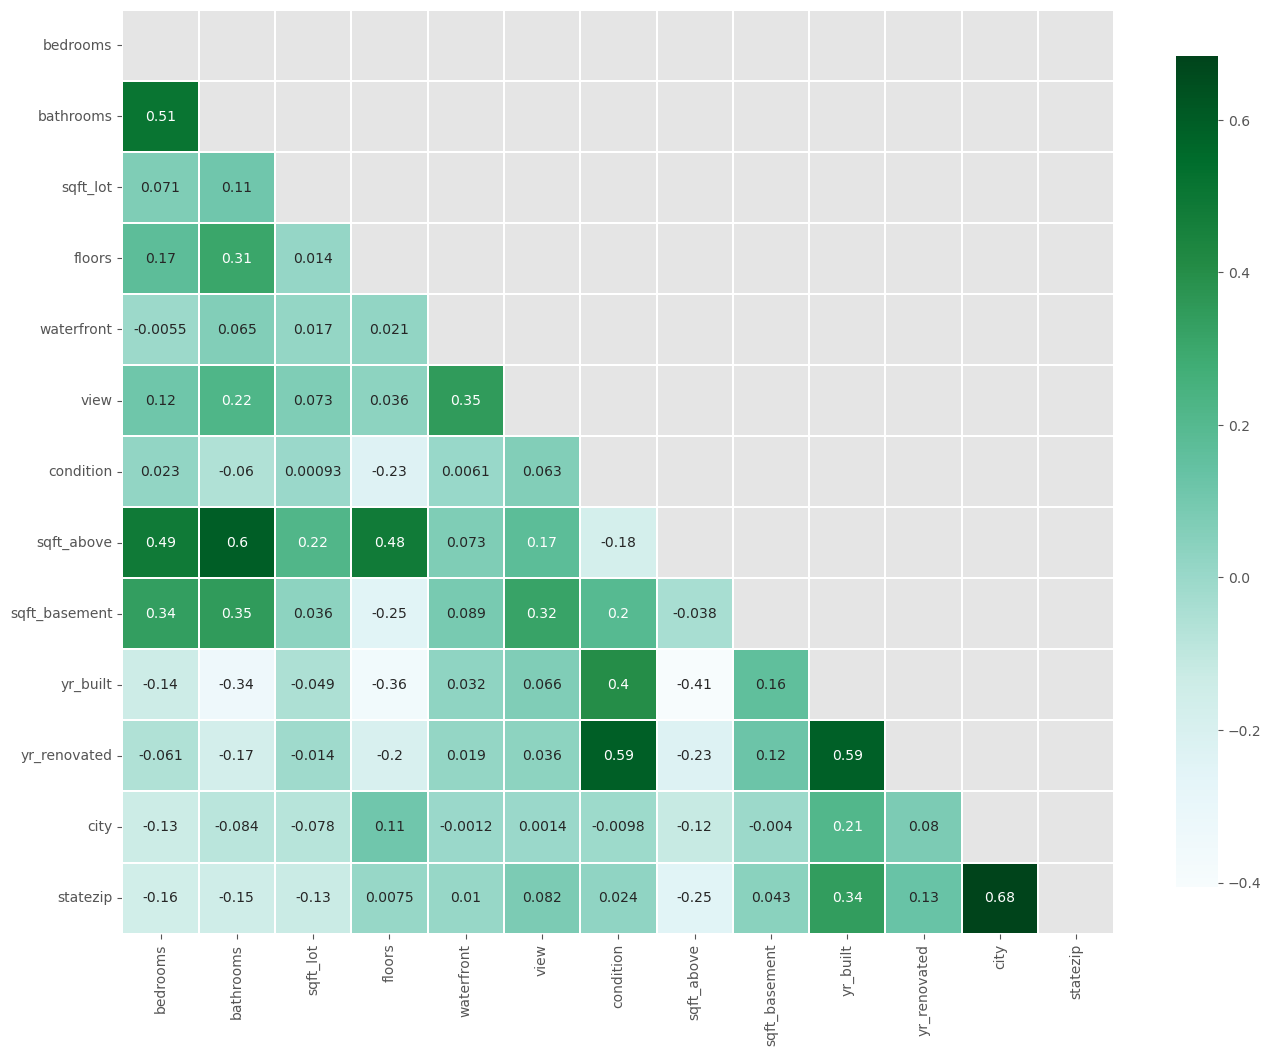

In [29]:
f, ax = plt.subplots(figsize=(16, 12))


mask = np.zeros_like(housedata_corr, dtype=bool) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    housedata_corr,
    linewidths=0.25,
    cmap="BuGn",
    linecolor='w',
    annot=True,
    annot_kws={"size":10},
    mask=mask,
    cbar_kws={"shrink": .9},
)
plt.show()

Vemos que hay algunas variables con correlaciones algo altas

In [30]:
def show_correlations(th):
    correlations=dict()
    for i,name in enumerate(housedata_corr.index):
        cols = list(housedata_corr.columns[i+1:])
        for col in cols:
            correlations[(name, col)] = housedata_corr.loc[name,col]

    return pd.DataFrame(
        data=[(i,c,v) for ((i,c),v) in correlations.items() if np.abs(v) > th],
        columns=["feat1", "feat2", "r"]).sort_values("r", ascending=False).set_index("feat1", drop=True)

show_correlations(0.5)

,feat2,r
feat1,,
city,statezip,0.683687
bathrooms,sqft_above,0.596946
condition,yr_renovated,0.590633
yr_built,yr_renovated,0.588599
bedrooms,bathrooms,0.512065


<div class="alert alert-block alert-info">
<p>
<b><a id="correlations">[3]</a></b> La existencia de variables correlacionadas puede indicar que estas son redundantes. La existencia de variables redundantes puede afectar al rendimiento del modelo. Pero no siempre. Correlación no implica dependencia lineal.
</p>
<p>
Esto plantea la posibilidad de eliminar algunas variables correlacionadas entre sí. Viendo la tabla anterior podremos probar las siguientes opciones
    <ul>
        <li>
            A) no hacer nada
        </li>
        <li>
            B) eliminar <code>sqft_above, yr_renovated, bedrooms</code>
        </li>
    </ul>
</p>
</div>

## Formulación de hipótesis de entrenamiento

Llegados a este punto tenemos tres hipótesis de entrenamiento

- Eliminar valores anómalos [[1]](#outliers). Tenemos dos opciones: eliminar o no eliminar.
- Probar eliminando `city` y/o `statezip` [[2]](#city_and_statezip). Tenemos cuatro opciones
    - No elimiinar nada
    - Eliminar ambas
    - Eliminar sólo `city``
    - Eliminar sólo `statezip`
- Probar a quitar variables correlacionadas [[3]](#correlations). Tenemos dos opciones, eliminar o no eliminar.

Para probar todo esto vamos a diseñar distintos experimentos combinando las distintas alternativas. En total vamos a realizar `2 x 4 x 2 = 16` experimentos.

En la fase de evaluación comprobaremos cuál es la mejor hipótesis comparando la precisión media obtenida en cada experimento.


En vez de generar los experimentos manualmente, vamos definir algunas funciones que nos ayuden a automatizarlo


In [31]:
## Hipótesis 1: Eliminación de valores anómalos

# Mediante esta función eliminamos todos los valores anómalos del dataframe
def remove_outliers(df):
    print("Borrando outliers")
    print(df.shape)
    r1 = len(df)
    data = df[NUMERIC_COLUMNS]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = df[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(data.shape)
    r2 = len(data)
    print(f"pérdida de datos: {((r1 - r2)/r1)*100:.2f}%")
    return data

# Unit Test
df = remove_outliers(housedata)
assert df.shape[0] < housedata.shape[0]
assert df.shape[1] == housedata.shape[1]

del df

Borrando outliers
(4551, 14)
(2243, 14)
pérdida de datos: 50.71%


In [32]:
# Mediante esta función generamos los experimentos para la hipótesis 1
def generate_h1_experiments(df):
    processors = {
        "remove-outliers": remove_outliers,
        "do-not-remove-outliers": None
    }
    for name, fn in processors.items():
        if fn is None:
            yield name, df
        else:
            yield name, fn(df)

# Unit Test
experiments = list(generate_h1_experiments(housedata))
assert len(experiments) == 2
df1 = experiments[0][1].shape[0]
df2 = experiments[1][1].shape[0]
assert df1 < df2
del df1, df2, experiments

Borrando outliers
(4551, 14)
(2243, 14)
pérdida de datos: 50.71%


In [33]:
## Hipótesis 2: eliminar o no city y/o statezip
def generate_h2_experiments(df):
    # Diccionario
    # Nombre del experimento, columnas a eliminar
    experiments = {
        "keep_all_columns": [],
        "-statezip -city": ['statezip', 'city'],
        "-statezip": ["statezip"],
        "-city": ["city"],
    }
    
    for name, cols in experiments.items():
        yield name, df.drop(cols, axis=1)

# Unit test
experiments = list(generate_h2_experiments(housedata))
assert len(experiments) == 4
df1 = experiments[0][1].shape[1]
df2 = experiments[1][1].shape[1]
df3 = experiments[2][1].shape[1]
df4 = experiments[3][1].shape[1]

assert df1 > df3 > df2
assert df3 == df4

del df1, df2, df3, df4, experiments

In [34]:
# Hipótesis basadas en la eliminación de correlaciones

def generate_h3_experiments(df):
    # Diccionario
    # Nombre del experimento, columnas a eliminar
    experiments = {
        "do-not-remove-correlated": [],
        "remove-correlated": ["sqft_above", "yr_renovated", "bedrooms"],
    }
    
    for name, cols in experiments.items():
        yield name, df.drop(cols, axis=1)

# Unit Test
experiments = list(generate_h3_experiments(housedata))
assert len(experiments) == 2
df1 = experiments[0][1].shape[1]
df2 = experiments[1][1].shape[1]
assert df1 > df2
del df1, df2, experiments

In [35]:
# Generador de experimentos
def generate_experiments(df):
    experiments = list()
    for name1, df1 in generate_h1_experiments(df):
        for name2, df2 in generate_h2_experiments(df1):
            for name3, df3 in generate_h3_experiments(df2):
                hn = name1 + " : " + name2 + " : " + name3
                experiments.append((hn, df3))
    return experiments

# Unit Test
experiments = list(generate_experiments(housedata))
assert len(experiments) == 16
del experiments

Borrando outliers
(4551, 14)
(2243, 14)
pérdida de datos: 50.71%


In [36]:
# Mostramos un resumen de los experimentos

experiments_summary = pd.DataFrame(
    columns=["Experiment name", "Shape"],
    data=[(name, df.shape) for (name, df) in generate_experiments(housedata)]
)
pd.set_option('display.max_colwidth', None)
experiments_summary

Borrando outliers
(4551, 14)
(2243, 14)
pérdida de datos: 50.71%


,Experiment name,Shape
0,remove-outliers : keep_all_columns : do-not-remove-correlated,"(2243, 14)"
1,remove-outliers : keep_all_columns : remove-correlated,"(2243, 11)"
2,remove-outliers : -statezip -city : do-not-remove-correlated,"(2243, 12)"
3,remove-outliers : -statezip -city : remove-correlated,"(2243, 9)"
4,remove-outliers : -statezip : do-not-remove-correlated,"(2243, 13)"
5,remove-outliers : -statezip : remove-correlated,"(2243, 10)"
6,remove-outliers : -city : do-not-remove-correlated,"(2243, 13)"
7,remove-outliers : -city : remove-correlated,"(2243, 10)"
8,do-not-remove-outliers : keep_all_columns : do-not-remove-correlated,"(4551, 14)"
9,do-not-remove-outliers : keep_all_columns : remove-correlated,"(4551, 11)"


## Entrenamiento

En esta fase iteraremos por cada uno de los experimentos definidos en la fase anterior y entrenaremos un modelo para cada caso.

Vamos a definir unas cuantas funciones y clases que nos ayuden a automatizarlo todo

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [38]:
# El DataFrame contiene variables categóricas que necesitaremos codificar mediante un LabelEncoder

def encode_categorical_vars(X):
    X_out = X.copy()
    encoders = dict()
    
    for col in X_out.columns:
        if col not in CATEGORICAL_COLUMNS:
            continue
        le = LabelEncoder()
        print("Encoding:", col)
        X_out[col] = le.fit_transform(list(X_out[col].astype(str).values))
        encoders[col] = le
        
    
    return X_out, encoders

# Unit Test
X_out, encoders = encode_categorical_vars(housedata)
assert X_out.shape == housedata.shape
assert len(encoders) == len(CATEGORICAL_COLUMNS)

del X_out, encoders

Encoding: city
Encoding: statezip


In [39]:
# Mediante esta función usamos diferentes scaler para escalar los datos

# En cada experimento entrenaremos varios modelos, cada uno de ellos usando un método de escalado diferente,
#  y nos quedaremos con el mejor

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

all_scalers = [None, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler]
# all_scalers = [None]

def scale_data(X_train, X_test, y_train, y_test):
    target = TARGET[0]
    
    for Sc in all_scalers:
        scalers = dict()
        X_train_out = X_train.copy()
        X_test_out = X_test.copy()
        y_train_out = y_train.copy().reshape(1, -1)[0]
        y_test_out = y_test.copy().reshape(1, -1)[0]
        
        if Sc is not None:
            # Usamos un scaler para la variable objetivo
            scaler_y = Sc()
            scalers[target] = scaler_y
            y_train_out = scaler_y.fit_transform(y_train.reshape(-1, 1)).reshape(1, -1)[0]
            y_test_out = scaler_y.transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

            # Usamos otro scaler ditinto para las variables de superficie
            sqft_cols = [c for c in X_train_out.columns if c.startswith("sqft")]
            scaler_sqft = Sc()
            scalers["sqft"] = scaler_sqft
            X_train_out.loc[:, sqft_cols] = scaler_sqft.fit_transform(X_train_out.loc[:, sqft_cols])
            X_test_out.loc[:, sqft_cols] = scaler_sqft.transform(X_test_out.loc[:, sqft_cols])
        
    
        yield X_train_out, X_test_out, y_train_out, y_test_out, scalers
        

# Unit Test
X = housedata[NUMERIC_COLUMNS + CATEGORICAL_COLUMNS]
y = housedata[TARGET]

data = list(scale_data(
    *train_test_split(X, y.to_numpy(), test_size=0.2)
))
assert len(data) == len(all_scalers)

for X_train_out, X_test_out, y_train_out, y_test_out, scalers in data:
    assert X_train_out.shape[1] == X_test_out.shape[1] == housedata[NUMERIC_COLUMNS + CATEGORICAL_COLUMNS].shape[1]
    

del X, y, X_train_out, X_test_out, y_train_out, y_test_out, scalers, data

In [40]:
# Esta clase encapsula el algoritmo de entrenamiento que reutilizaremos en todos los experimentos
class Training:
    def __init__(self, encoders=None, scalers=None):
        self.encoders = encoders     # Label encoders usados para las variables categóricas
        self.scalers = scalers       # Scalers usados par normalizar los datos
        self.model = None            # El modelo de regresión lineal entrenado
        self.fitted_values = None    # Predicciones del modelo sobre los datos de entrenamiento
        self.test_predictions = None # Predicciones del modelo sobre los datos de test
        self.mse_train = None        # Error cuadrático medio sobre los datos de entrenamienti
        self.mse_test = None         # Error cuadrático medio sobre los datos de test
        self.num_features = None     # Número de variables usadas para el entrenamiento
        
    def train_model(self, X_train, X_test, y_train, y_test):
#         print(f"\tTraining set. X: {X_train.shape}, y: {y_train.shape}")
#         print(f"\tTest set. X: {X_test.shape}, y: {y_test.shape}")
        
        self.num_features = X_train.shape[1]
        
        # Entrenamos el modelo
        self.model = LinearRegression()
        self.model.fit(X_train, y_train)
        
        # Almacenamos resultados del entrenamiento
        self.fitted_values = self.model.predict(X_train)
        self.test_predictions = self.model.predict(X_test)
        
        
        # Evaluamos el modelo
        self.mse_train = self.calculate_mse(y_true=y_train, y_pred=self.fitted_values)
#         print("\tTRAIN MSE:", self.mse_train)
        self.mse_test = self.calculate_mse(y_true=y_test, y_pred=self.test_predictions)
#         print("\tTEST_MSE:", self.mse_test)

    def calculate_mse(self, y_true, y_pred):
        if (self.scalers is not None) and (TARGET[0] in self.scalers):
            scaler = self.scalers[TARGET[0]]
            y_true = scaler.inverse_transform(y_true.reshape(-1, 1)).reshape(1, -1)[0]
            y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(1, -1)[0]
        return mean_squared_error(y_true=y_true, y_pred=y_pred)

# Unit Test
X = housedata[NUMERIC_COLUMNS]
y = housedata[TARGET]

t = Training()
t.train_model(*train_test_split(
    X, y.to_numpy(), test_size=0.2
))

assert t.model is not None
assert len(y) == len(t.fitted_values) + len(t.test_predictions)
assert t.mse_train > 0
assert t.mse_test > 0
assert t.num_features == len(NUMERIC_COLUMNS)

del X, y, t

In [41]:
# En esta clase encapsulamos el procedimiento que llevaremos a cabo en cada experimento
class Experiment:
    def __init__(self):
        self.features = None               # Columnas usadas en el exprimiento
        self.trainings: [Training] = None  # Distintos entrenamientos para la hipótesis
        self.best_model: Training = None   # Modelo con mayor precisión
            
    def train_models(self, df):
        self.features = list(df.columns)
        target = TARGET[0]
        
        if self.trainings is None:
            self.trainings = []
        
        X = df.drop(target, axis=1)
        y = df[[target]]
        
        # Escalamos variables categóricas
        X, encoders = encode_categorical_vars(X)
        
        
        # Separamos el dataset en conjunto de entrenamiento y de test
        X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y.to_numpy(), 
            test_size=0.2, random_state=42
        )
#         print(f"\tTraining set. X: {X_train.shape}, y: {y_train.shape}")
#         print(f"\tTest set. X: {X_test.shape}, y: {y_test.shape}")
        
        # Bucle de entrenamiento
        for X_train, X_test, y_train, y_test, scalers in scale_data(X_train, X_test, y_train, y_test):
            training = Training(encoders, scalers)
            training.train_model(X_train, X_test, y_train, y_test)
            self.trainings.append(training)
            
        # Seleccionar el mejor modelo
        min_mse = None
        for tr in self.trainings:
            tr_mse = max(tr.mse_train, tr.mse_test)
            if (self.best_model is None) or (tr_mse < min_mse):
                self.best_model = tr
                min_mse = tr_mse
                
        
        scdict = self.best_model.scalers
        scdesc = list(scdict.values()) if len(scdict) > 0 else []
        if len(scdesc) == 0:
            scdesc = "no-scaler"
        else:
            scdesc = scdesc[0]
        print("Features:", self.features)
        print("\tEl mejor modelo ha hecho uso de:", scdesc)
        print("\t\tTRAIN MSE:", self.best_model.mse_train)
        print("\t\tTEST_MSE:", self.best_model.mse_test)
        
    
# Unit Test        
name, df = generate_experiments(housedata)[0]

exp = Experiment()
exp.train_models(df)     

Borrando outliers
(4551, 14)
(2243, 14)
pérdida de datos: 50.71%
Encoding: city
Encoding: statezip
Features: ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip']
	El mejor modelo ha hecho uso de: StandardScaler()
		TRAIN MSE: 31509723321.02142
		TEST_MSE: 1913857738849.7358


In [42]:
# Bucle de entrenamiento

all_experiments = []  # Almacenaremos en esta lista todos los experimentos
for i, dat in enumerate(generate_experiments(housedata)):
    name, df = dat
    print(f"Experimento #{i:02d}: {df.shape} {name}")
    exp = Experiment()
    exp.train_models(df)
    all_experiments.append((name, exp))
    print()

Borrando outliers
(4551, 14)
(2243, 14)
pérdida de datos: 50.71%
Experimento #00: (2243, 14) remove-outliers : keep_all_columns : do-not-remove-correlated
Encoding: city
Encoding: statezip
Features: ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip']
	El mejor modelo ha hecho uso de: StandardScaler()
		TRAIN MSE: 31509723321.02142
		TEST_MSE: 1913857738849.7358

Experimento #01: (2243, 11) remove-outliers : keep_all_columns : remove-correlated
Encoding: city
Encoding: statezip
Features: ['price', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'city', 'statezip']
	El mejor modelo ha hecho uso de: no-scaler
		TRAIN MSE: 39896598164.7396
		TEST_MSE: 1917560528869.9065

Experimento #02: (2243, 12) remove-outliers : -statezip -city : do-not-remove-correlated
Features: ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors'

## Evaluación

In [43]:
# Buscamos el mejor experimento

best_experiment = None

for name, exp in all_experiments:
    if (best_experiment is None) or (exp.best_model.mse_test < best_experiment[1].best_model.mse_test):
        best_experiment = (name, exp)
        
name,  exp = best_experiment
print("Mejor experimento:", name)
print()
print("MSE TRAIN:", round(exp.best_model.mse_train, 5))
print("RMSE TRAIN:", round(math.sqrt(exp.best_model.mse_train), 5))
print()
print("MSE TEST:", round(exp.best_model.mse_test, 7))
print("RMSE TEST:", round(math.sqrt(exp.best_model.mse_test), 7))

Mejor experimento: do-not-remove-outliers : keep_all_columns : do-not-remove-correlated

MSE TRAIN: 288225468839.94635
RMSE TRAIN: 536866.34169

MSE TEST: 57966929069.839874
RMSE TEST: 240763.2220042


<div class="alert alert-block alert-success"> 
    <p>Hemos conseguido un modelo con una precisión basate buena con un RMSE de $0,009.</p>
    <p>Para conseguir este resultado
    <ul>
    <li>No hemos quitado valores anómalos</li>
    <li>No hemos eliminado ni <code>city</code> ni <code>statezip</code></li>
    <li>No hemos eliminado las variables correlacionadas</li>
    </ul>
    </p> 
</div>

Nos surge una pregunta ¿es mucho más preciso el modelo si mantenemos `city` y `statezip`?

In [44]:
# Mostramos una tabla ordenada con la precisión obtenida en cada experimento

def scaler_name(scalers: dict) -> str:
    if len(scalers) == 0:
        return "no-scaler"
    else:
        return str(list(scalers.values())[0])

eval_data = [
    (
        name, 
        scaler_name(exp.best_model.scalers), 
        exp.best_model.mse_train, 
        exp.best_model.mse_test,
    ) 
    for (name, exp) in all_experiments
]

df_eval = (
    pd.DataFrame(eval_data, columns=["Name", "Scaler", "MSE_TRAIN", "MSE_TEST"])
).sort_values("MSE_TEST").set_index("Name")

df_eval["RMSE_TEST"] = df_eval.MSE_TEST.apply(math.sqrt)
df_eval

,Scaler,MSE_TRAIN,MSE_TEST,RMSE_TEST
Name,,,,
do-not-remove-outliers : keep_all_columns : do-not-remove-correlated,StandardScaler(),2.882255e+11,5.796693e+10,2.407632e+05
do-not-remove-outliers : -statezip : do-not-remove-correlated,no-scaler,2.886098e+11,5.860853e+10,2.420920e+05
do-not-remove-outliers : -city : do-not-remove-correlated,MinMaxScaler(),2.888702e+11,5.894857e+10,2.427933e+05
do-not-remove-outliers : -statezip -city : do-not-remove-correlated,RobustScaler(),2.888872e+11,5.899397e+10,2.428867e+05
do-not-remove-outliers : keep_all_columns : remove-correlated,StandardScaler(),3.120358e+11,7.531588e+10,2.744374e+05
do-not-remove-outliers : -city : remove-correlated,no-scaler,3.129617e+11,7.695989e+10,2.774165e+05
do-not-remove-outliers : -statezip : remove-correlated,MinMaxScaler(),3.137020e+11,7.787484e+10,2.790606e+05
do-not-remove-outliers : -statezip -city : remove-correlated,MinMaxScaler(),3.137256e+11,7.796617e+10,2.792242e+05
remove-outliers : -statezip : do-not-remove-correlated,RobustScaler(),3.184243e+10,1.913240e+12,1.383199e+06


In [45]:
# Mostramos la diferencia en RMSE entre mantener todas las columnas y quitar statezip y country
print(df_eval.loc['do-not-remove-outliers : keep_all_columns : do-not-remove-correlated'].RMSE_TEST)
print(df_eval.loc['do-not-remove-outliers : -statezip -city : do-not-remove-correlated'].RMSE_TEST)

240763.22200419207
242886.73512554105


<div class="alert alert-block alert-success"> 
    <p>Apenas hay diferencia entre ambos modelos</p>
    <p>Por lo tanto vamos a preferir eliminar las columnas <code>city</code> y <code>statezip</code>, de modo que nuestro modelo no dependa de ellas.
    </p> 
</div>

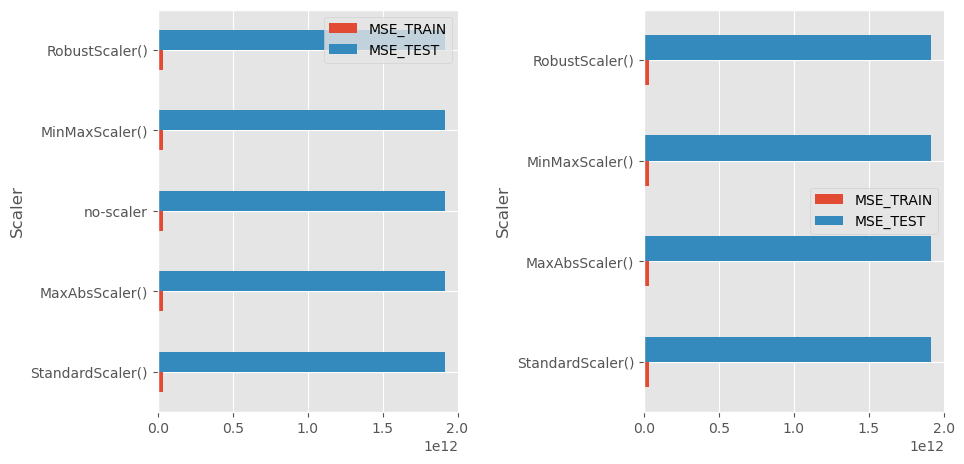

In [46]:
# Hay diferencia entre esalar los datos y no esclarlos

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

best = all_experiments[0][1]
df_sca_eval = pd.DataFrame(
    [(scaler_name(tr.scalers), tr.mse_train, tr.mse_test) for tr in best.trainings],
    columns=["Scaler", "MSE_TRAIN", "MSE_TEST"]
).set_index("Scaler", drop=True).sort_values("MSE_TEST", ascending=True)

df_sca_eval.plot(kind="barh", ax=axes[0])

df_sca_eval.drop("no-scaler").plot(kind="barh", ax=axes[1])

plt.tight_layout(pad=2.0)

Como vemos la diferencia es notable entre escalar y no escalar. De los cuatro métodos de escalado `MinMaxScaler` y `MaxAbsScaler` han ido mucho mejor que los otros dos.

¿Cuál de ellos funciona mejor?

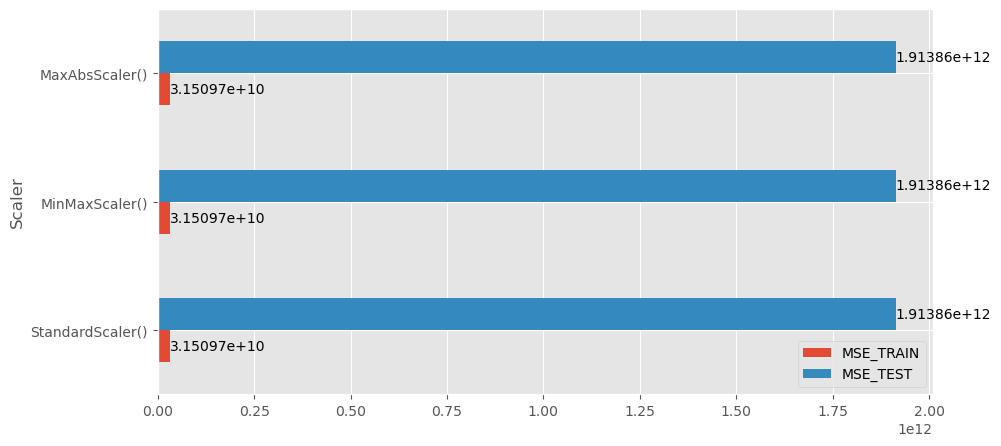

In [47]:
f, ax = plt.subplots(figsize=(10, 5))
df_sca_eval.loc[["StandardScaler()", "MinMaxScaler()", "MaxAbsScaler()"]].plot(kind="barh", ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<div class="alert alert-block alert-success"> 
    <code>MaxAbsScaler</code> funciona algo mejor que <code>MinMaxScaler</code> pero la diferencia no es mucha.
</div>

In [48]:
# Media de los errores según las hipótesis

df_eval = df_eval.reset_index()
for i, variant in enumerate(["Hypotesis #1", "Hypotesis #2", "Hypotesis #3"]):
    df_eval[variant] = df_eval.Name.apply(lambda x: x.split(":")[i])

    display(
        df_eval.groupby(variant).mean(numeric_only=True)[["MSE_TRAIN", "MSE_TEST", "RMSE_TEST"]].sort_values("MSE_TEST")
    )

,MSE_TRAIN,MSE_TEST,RMSE_TEST
Hypotesis #1,,,
do-not-remove-outliers,3.008772e+11,6.782935e+10,2.598342e+05
remove-outliers,3.636085e+10,1.915751e+12,1.384106e+06


,MSE_TRAIN,MSE_TEST,RMSE_TEST
Hypotesis #2,,,
keep_all_columns,1.679169e+11,9.911753e+11,820845.797204
-statezip,1.687084e+11,9.915653e+11,822185.655510
-city,1.688219e+11,9.921441e+11,822210.925013
-statezip -city,1.690289e+11,9.922764e+11,822639.073887


,MSE_TRAIN,MSE_TEST,RMSE_TEST
Hypotesis #3,,,
do-not-remove-correlated,1.603150e+11,9.862816e+11,812791.844191
remove-correlated,1.769231e+11,9.972990e+11,831148.881616


**Hipótesis 1. ¿Debemos eliminar los valores anómalos?**

Según la tabla anterior vemos que es mejor no eliminar los valores anómalos.

**Hipótesis 2. ¿Podemos eliminar `statezip` y `city`?**

Según la tabla podemos decidir que sí, ya que el error no varía mucho entre quitarlas y mantenerlas. El modelo generalizará mejor si las quitamos.

**Hipóteisis 3. ¿Debemos eliminar los valores correlacionados?**

No hay una gran diferencia entre eliminarlos y dejarlos.

## Conclusiones

En este ejercicio hemos construido un modelo de regresión para predecir el precio de la vivienda. Para ello nos hemos descargado un dataset de Kaggle, lo hemos analizado hemos formulado algunas hipótesis y hemos experimentado a con cuál conseguimos un menor error.

Finalmene hemos conseguido un modelo con un RMSE de 0,009 dólares (aproximadamente) lo cuál es un buen resultado.

Podríamos explorar otras opciones, por ejemplo:

- Buscar otros métodos de gestionar valores atípicos
- Probar otros modelos de regresión
- Enriquecer el dataset con más datos.